# Importando as bibliotecas que iremos utilizar


- **Pandas**: Manipulação e análise de dados, com suporte a DataFrames.
- **Numpy**: Computação numérica eficiente com arrays multidimensionais.
- **Matplotlib**: Visualização de dados em gráficos 2D.
- **Sklearn**: Ferramentas para modelagem, pré-processamento, e avaliação.
- **Seaborn**: Interface de alto nível para gráficos estatísticos aprimorados, baseado no Matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Carregando o Conjunto de Dados de Treinamento
Este trecho de código carrega o arquivo CSV chamado train.csv em um DataFrame chamado df. A função df.head() é usada para mostrar as primeiras cinco linhas do DataFrame, permitindo uma rápida visualização do conteúdo e estrutura dos dados. Essa parte é útil para entender rapidamente o que está incluído no conjunto de dados antes de prosseguir com a análise.

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


# Identificação de colunas com valores nulos presentes
* O tratamento de valores nulos em dataframes é fundamental para garantir a qualidade e precisão dos modelos de machine learning. Valores nulos podem causar problemas no treinamento, pois muitos algoritmos não lidam bem com dados incompletos, resultando em erros ou previsões imprecisas. A ausência de dados também pode distorcer as estatísticas e padrões, impactando negativamente as métricas do modelo.

In [ ]:
print(df.isnull().sum())

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


# Matriz de correlação

A matriz de correlação é uma ferramenta estatística usada para analisar o grau de relacionamento entre diferentes variáveis. A principal razão para construir uma matriz de correlação em projetos de machine learning é entender as inter-relações entre as features e como elas podem impactar o modelo.

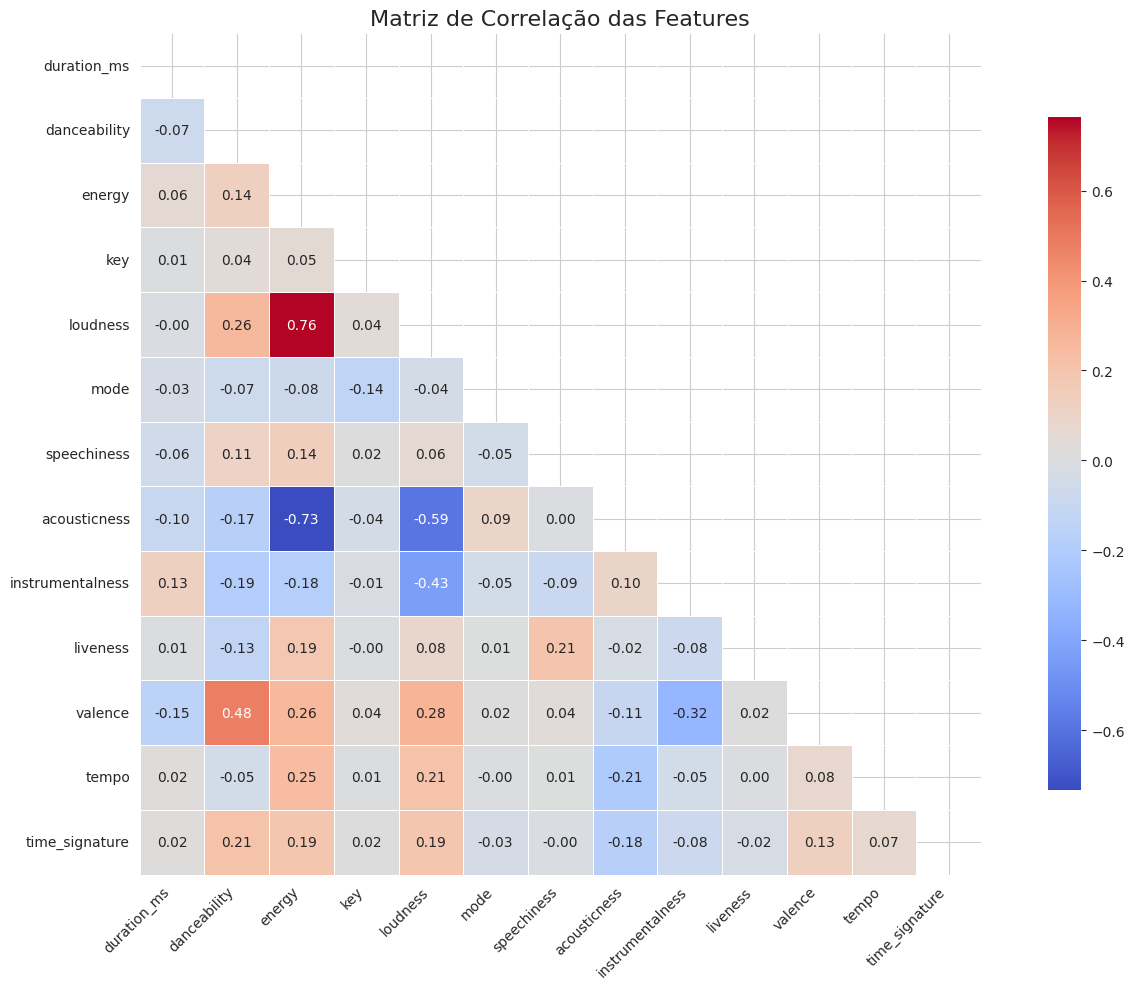

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_train_numeric = X_train.select_dtypes(include=[np.number])

correlation_matrix = X_train_numeric.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix,
            annot=True,
            mask=mask,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            square=True)


plt.title("Matriz de Correlação das Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)


plt.tight_layout()
plt.show()


# Exibindo Informações do DataFrame
O comando `print(df.info())` exibe um resumo do DataFrame `df`, incluindo o número de entradas e colunas, nomes das colunas, tipos de dados e contagem de valores não nulos. Essa informação é essencial para entender a estrutura do conjunto de dados, identificar colunas com dados ausentes e verificar os tipos de dados, facilitando o pré-processamento e a análise.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

# Resumo Estatístico do DataFrame
O resumo estatístico das colunas numéricas do DataFrame `df` fornece informações como contagem, média, desvio padrão, valores mínimo e máximo, e os quartis (25%, 50% e 75%). Essa análise é útil para entender as características numéricas dos dados, identificar padrões, distribuições e possíveis outliers.

In [ ]:
df.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


# Codificando Variáveis Categóricas com Label Encoding
Uma lista de colunas categóricas é definida para serem codificadas. O `LabelEncoder()` é então utilizado para converter essas colunas em valores numéricos, substituindo as categorias originais por inteiros. Essa etapa é crucial para preparar os dados para modelos de machine learning, que requerem entradas numéricas.

In [ ]:
label_cols = ['explicit', 'key', 'mode', 'time_signature']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Codificando Frequências de Variáveis Categóricas

O código define uma lista de colunas categóricas para codificação de frequência. Um loop itera sobre essas colunas, calculando a contagem de valores únicos e convertendo-os em um dicionário. A função `map()` substitui os valores originais pelas suas respectivas contagens. Essa transformação é útil para converter variáveis categóricas em numéricas, representando a popularidade de cada categoria e potencialmente melhorando o desempenho do modelo de machine learning.

In [ ]:
freq_cols = ['artists', 'album_name', 'track_name']

for col in freq_cols:
    freq_encoding = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_encoding)

# Remoção da coluna **track_id**
Após testes e análise da matriz de correlação, observei que a coluna `track_id` gerava ruídos durante a codificação e tinha influência mínima na variável alvo. Por isso, decidi excluí-la do conjunto de dados.

In [ ]:
df.drop('track_id', axis=1, inplace=True)


# Verificando como os dados ficaram após o tratamento
Após o tratamento dos dados, é fundamental analisar sua estrutura e características para garantir que as transformações foram eficazes. Isso inclui verificar a presença de valores ausentes, observar a distribuição das variáveis e entender como as codificações afetaram os dados, assegurando que estão prontos para serem utilizados em modelos de machine learning.

In [ ]:
print(df.head())

   track_unique_id  artists  album_name  track_name  duration_ms  explicit  \
0            41996        1           1           1       211533         0   
1            76471        7           2           1       196000         0   
2            54809       17           2           1       216506         0   
3            16326        1          27           1       218346         0   
4           109799      117          12           3       173160         0   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.305  0.8490    9   -10.795     1       0.0549      0.000058   
1         0.287  0.1900    7   -12.030     0       0.0370      0.930000   
2         0.583  0.5090    1    -9.661     1       0.0362      0.777000   
3         0.163  0.0368    8   -23.149     1       0.0472      0.991000   
4         0.647  0.9210    2    -7.294     1       0.1850      0.000939   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  \
0

# Identificação de possíveis outliers
Outliers são valores extremos em um conjunto de dados que se afastam significativamente da maioria dos outros pontos. Eles podem surgir devido a variações naturais, erros de medição ou situações específicas e têm o potencial de distorcer a análise, influenciando resultados estatísticos e a performance de modelos de machine learning.


Número de outliers em duration_ms: 3990


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


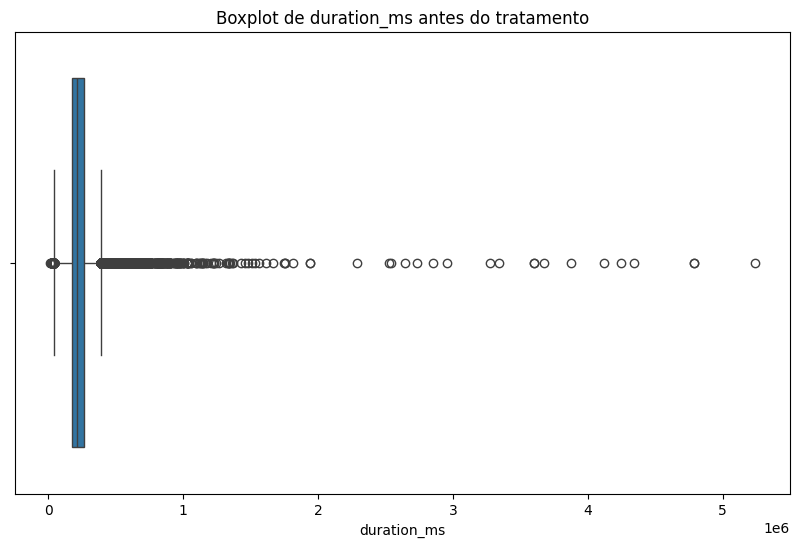

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


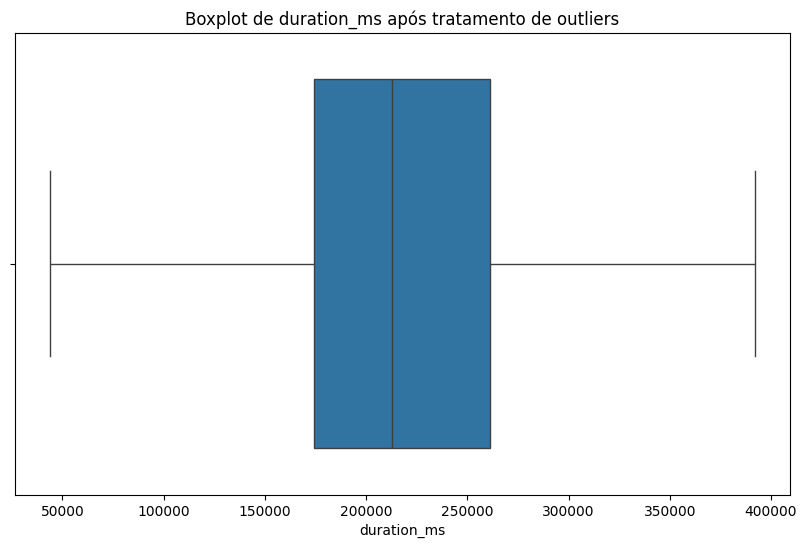

Número de outliers em explicit: 6838


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


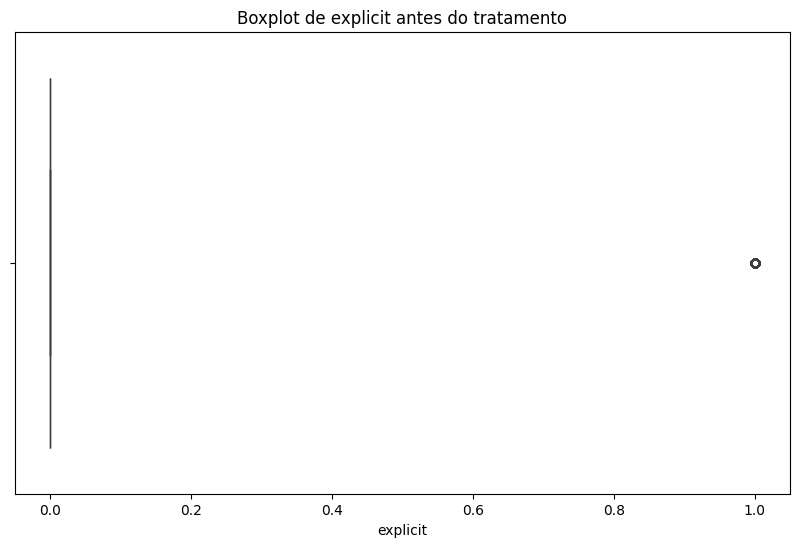

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


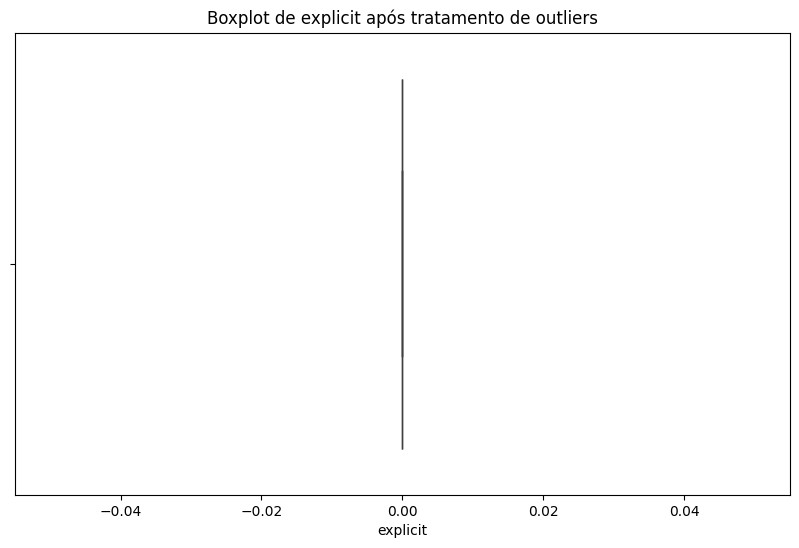

Número de outliers em danceability: 420


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


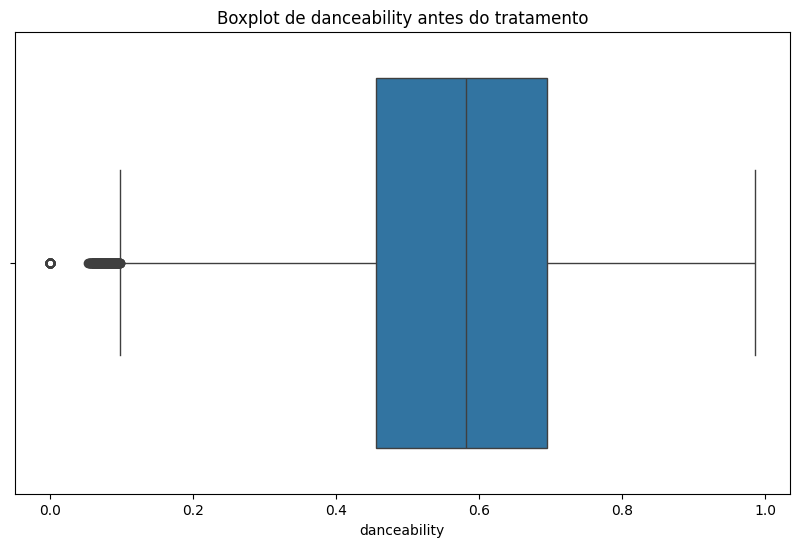

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


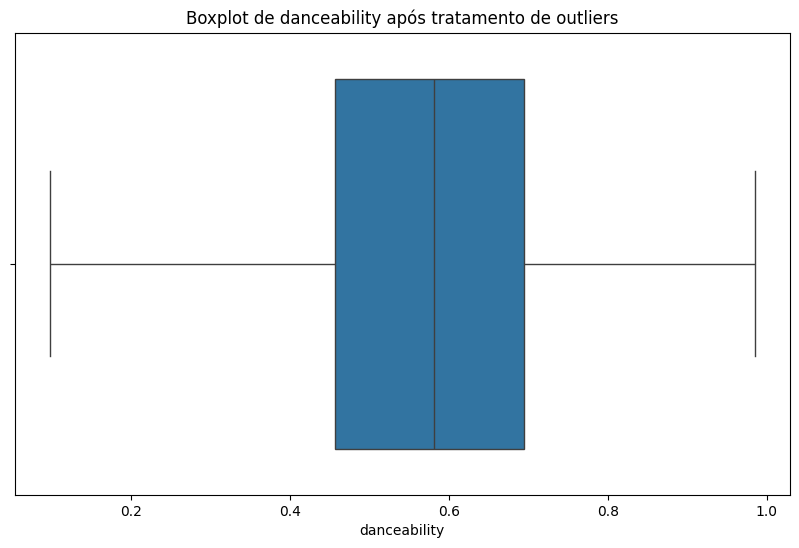

Número de outliers em energy: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


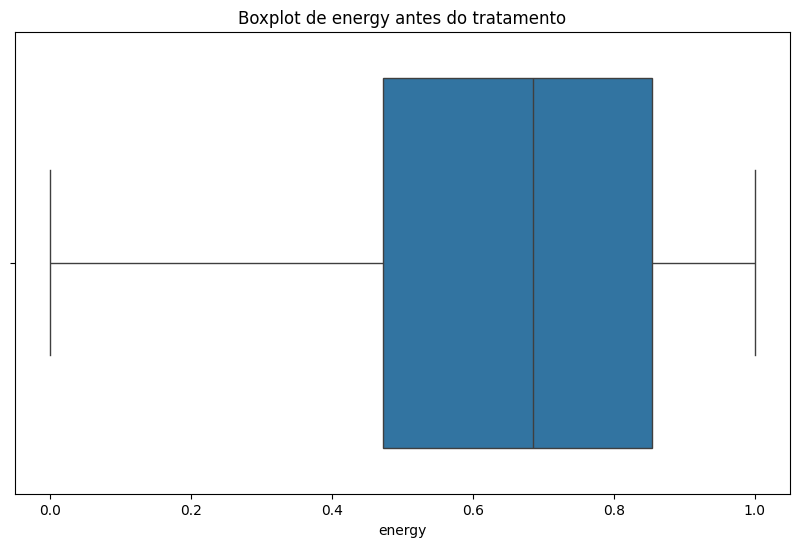

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


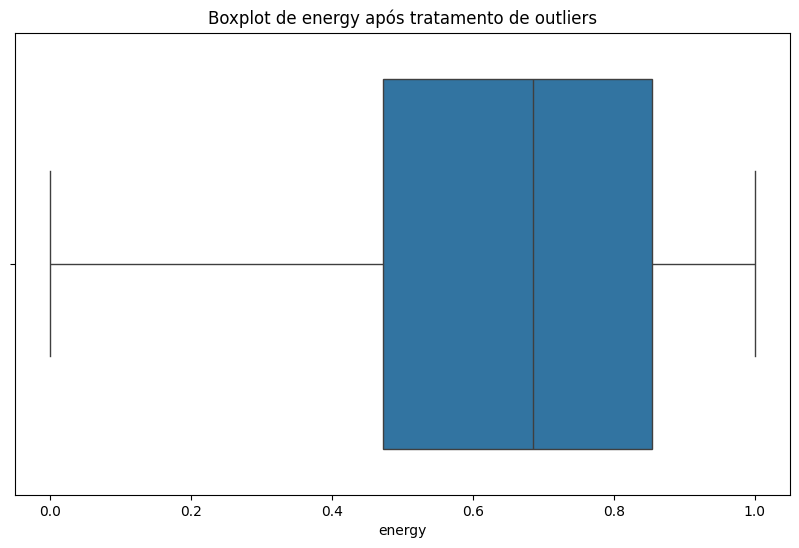

Número de outliers em key: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


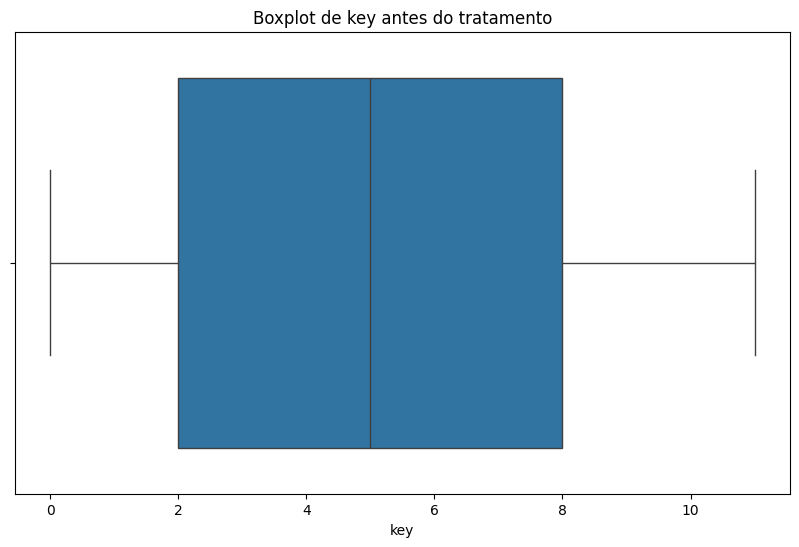

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


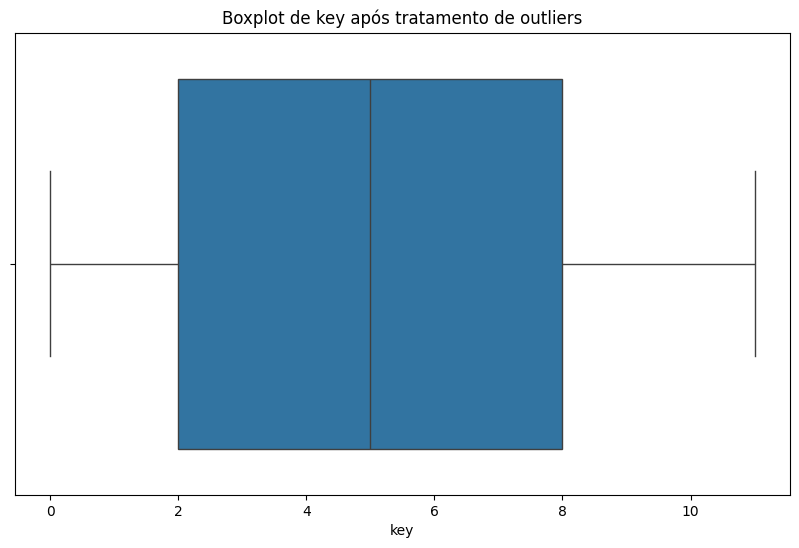

Número de outliers em loudness: 4351


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


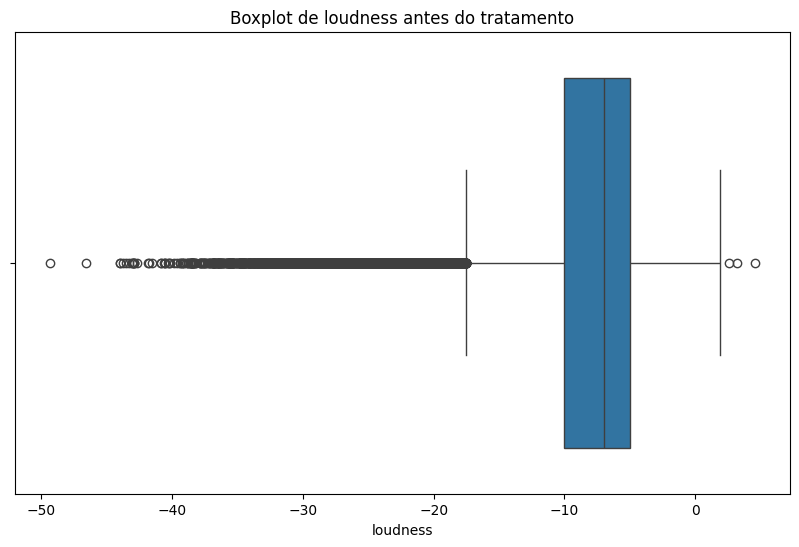

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


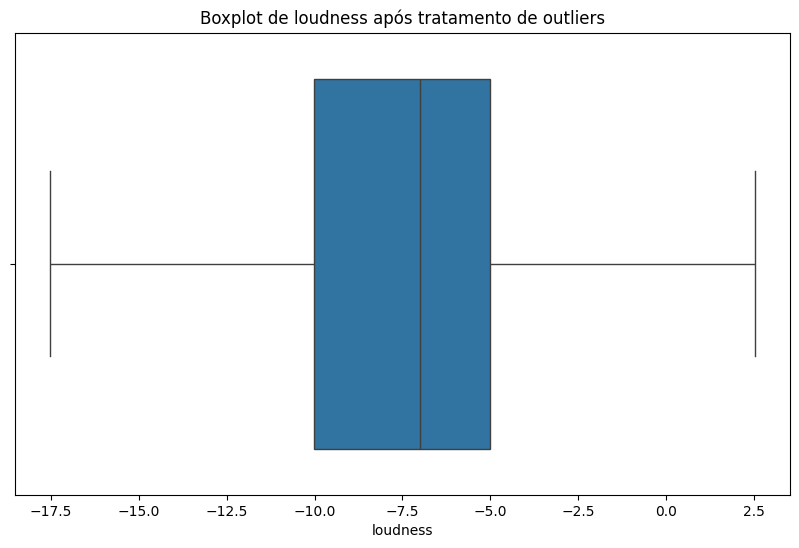

Número de outliers em mode: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


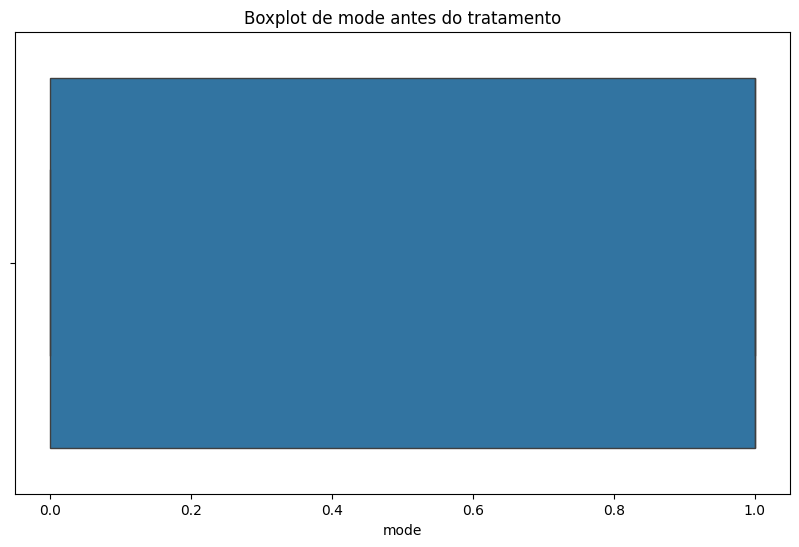

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


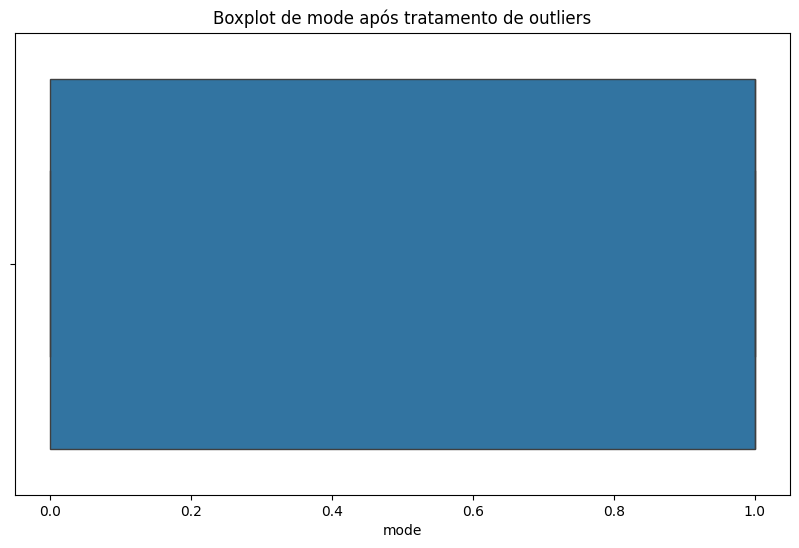

Número de outliers em speechiness: 9277


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


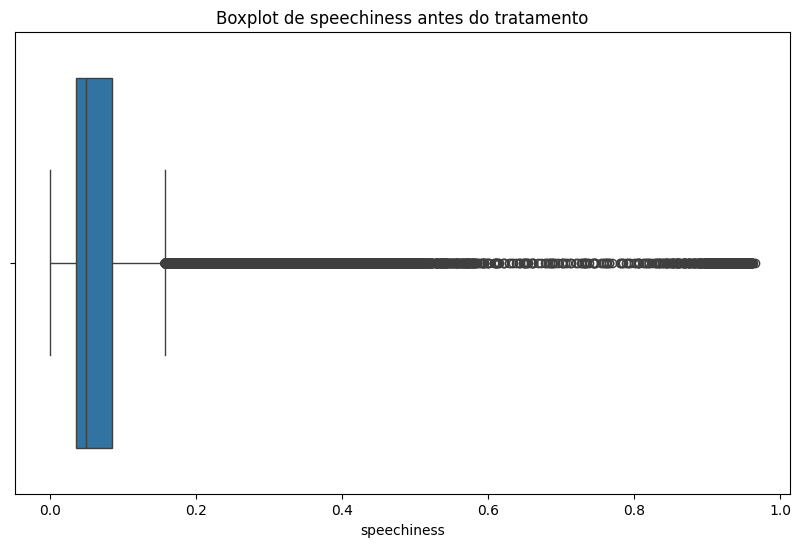

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


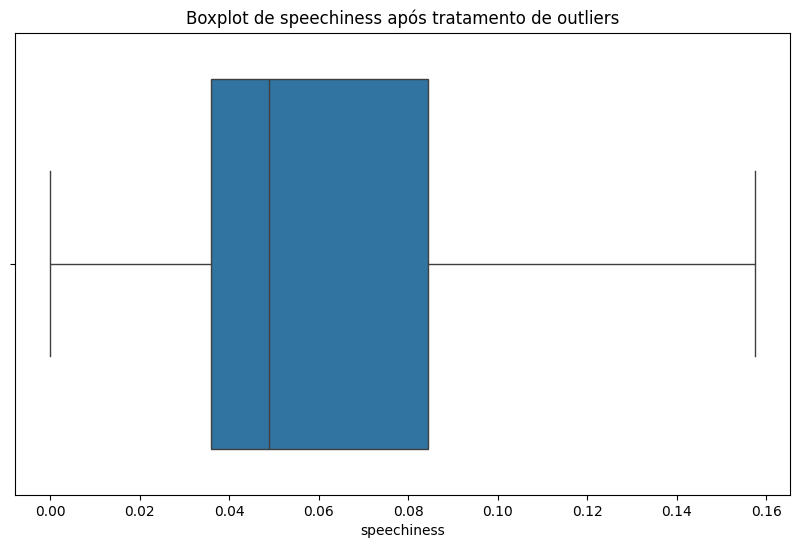

Número de outliers em acousticness: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


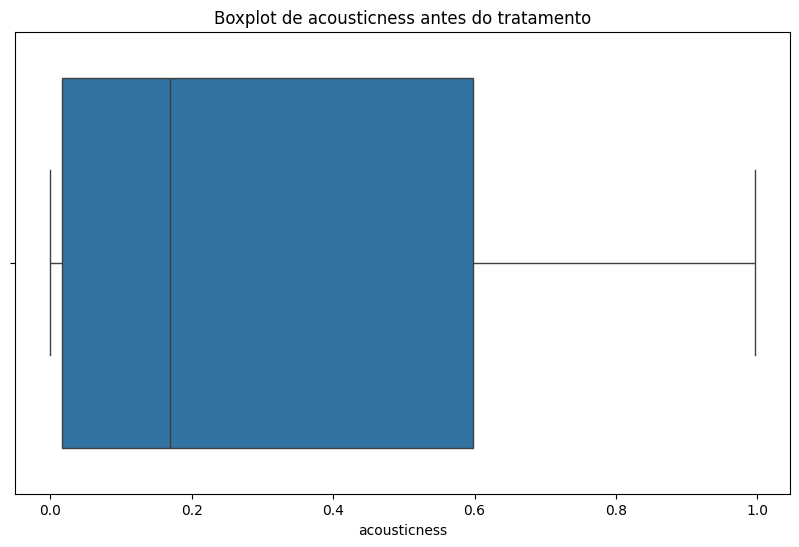

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


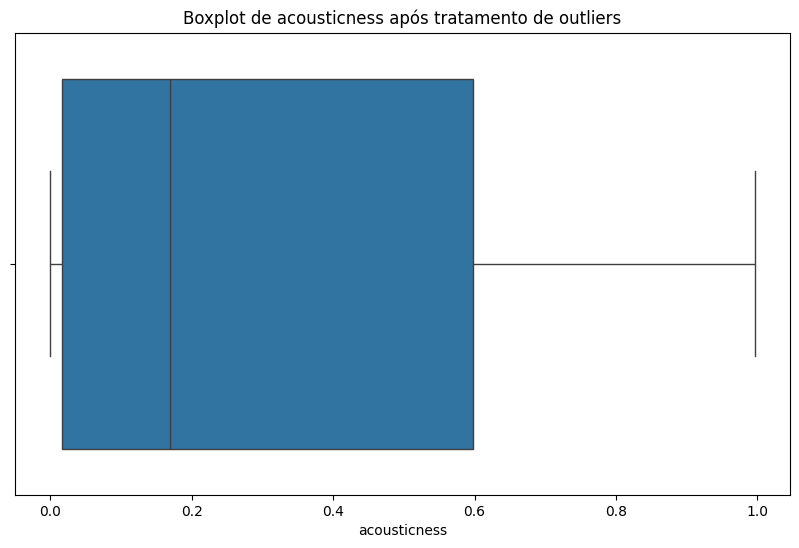

Número de outliers em instrumentalness: 17645


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


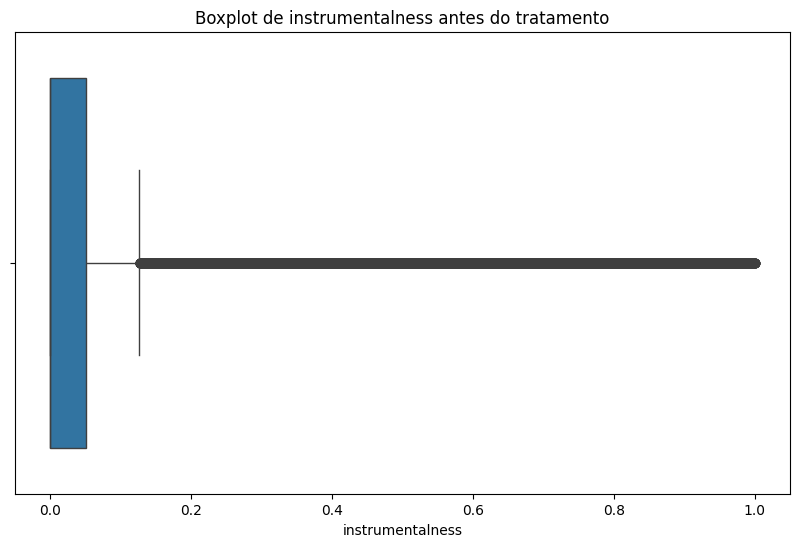

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


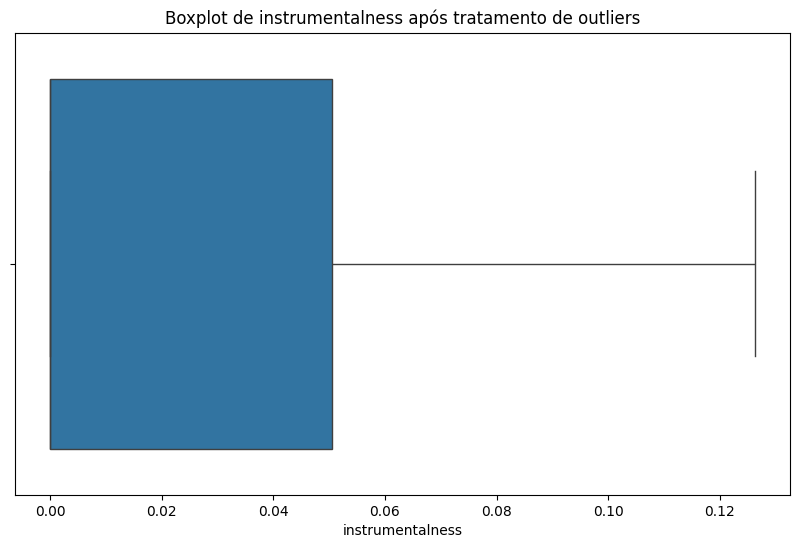

Número de outliers em liveness: 6032


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


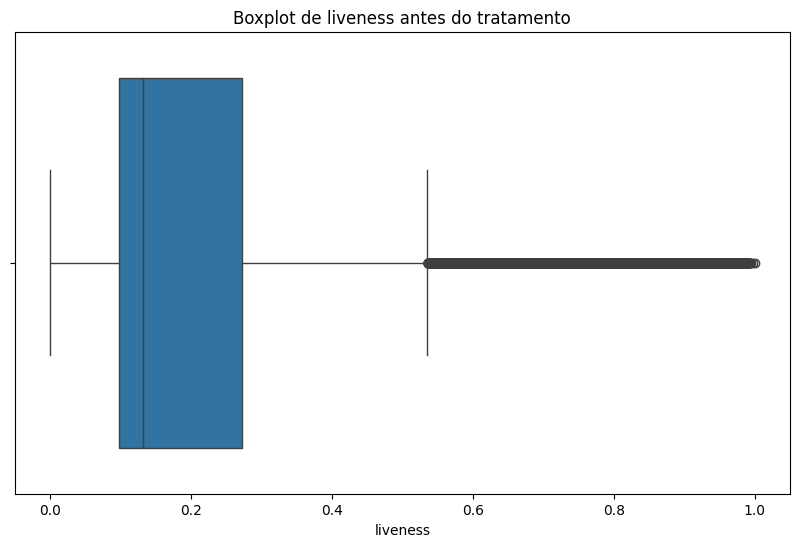

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


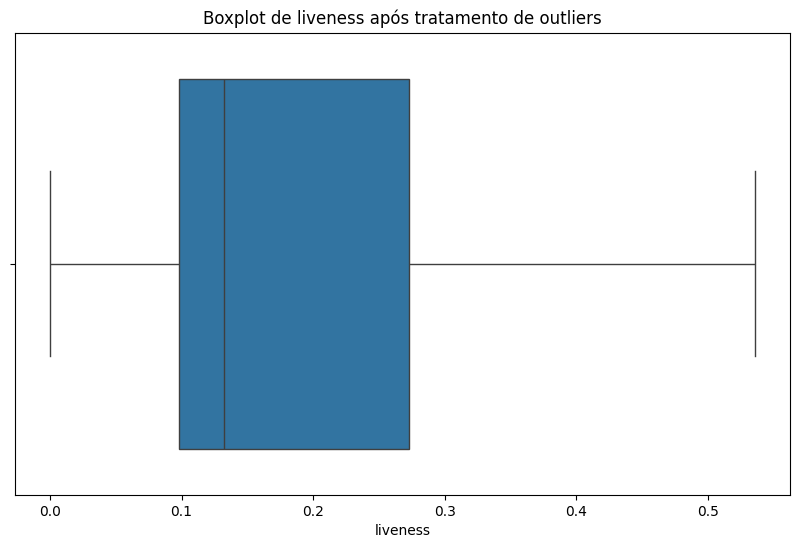

Número de outliers em valence: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


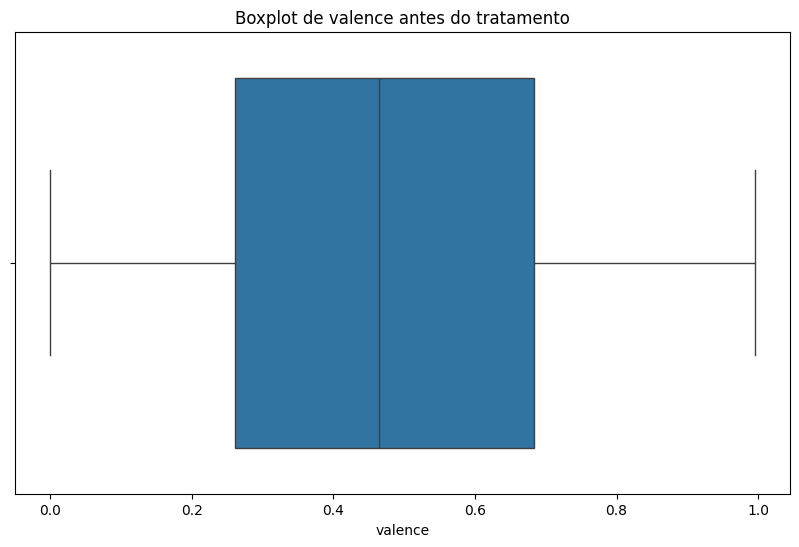

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


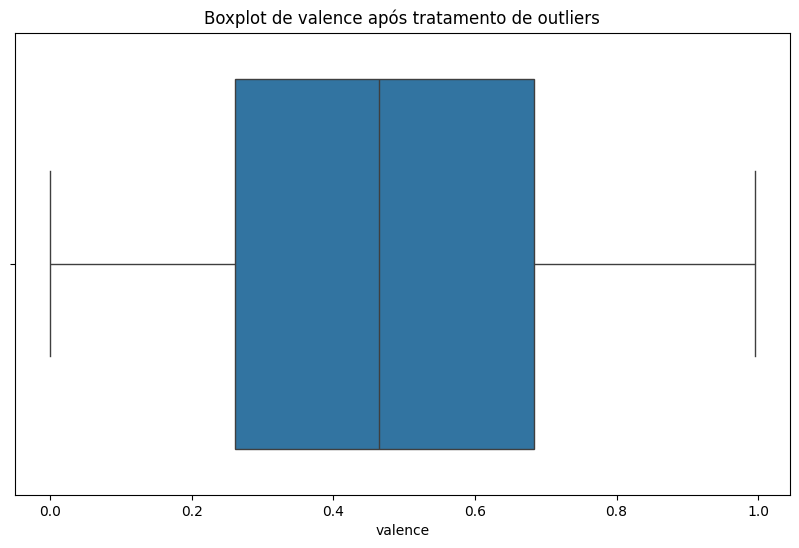

Número de outliers em tempo: 424


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


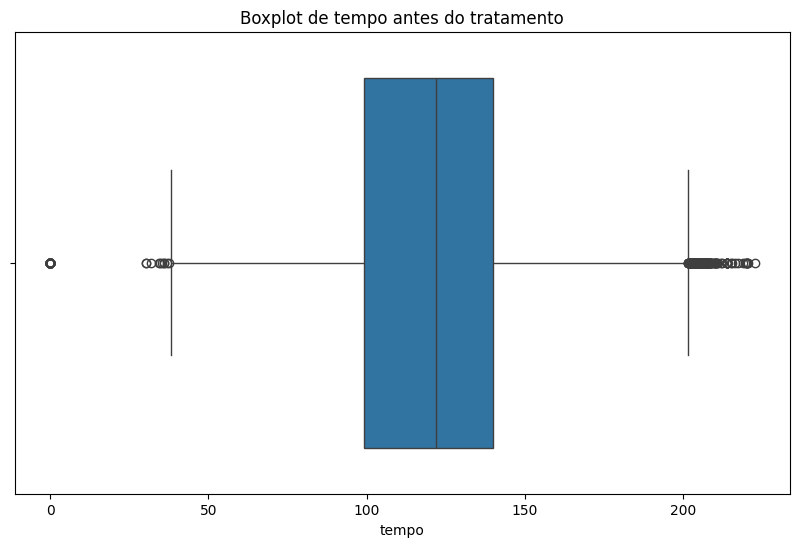

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


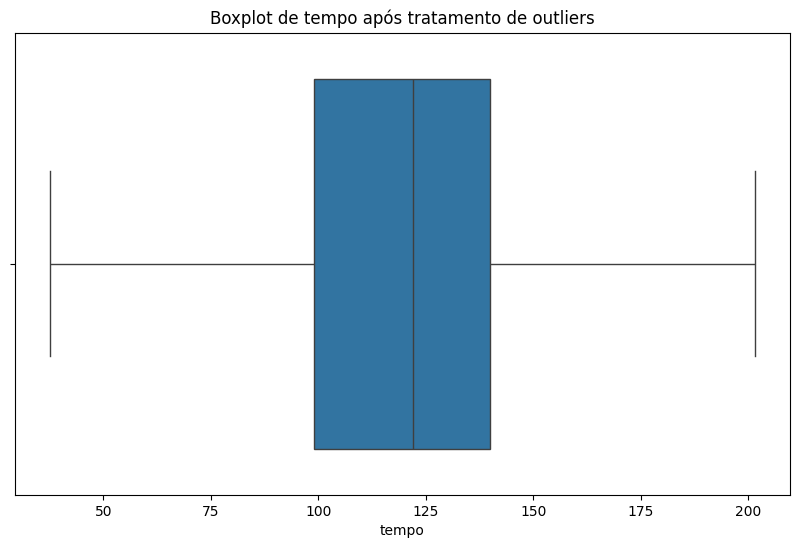

Número de outliers em time_signature: 8598


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


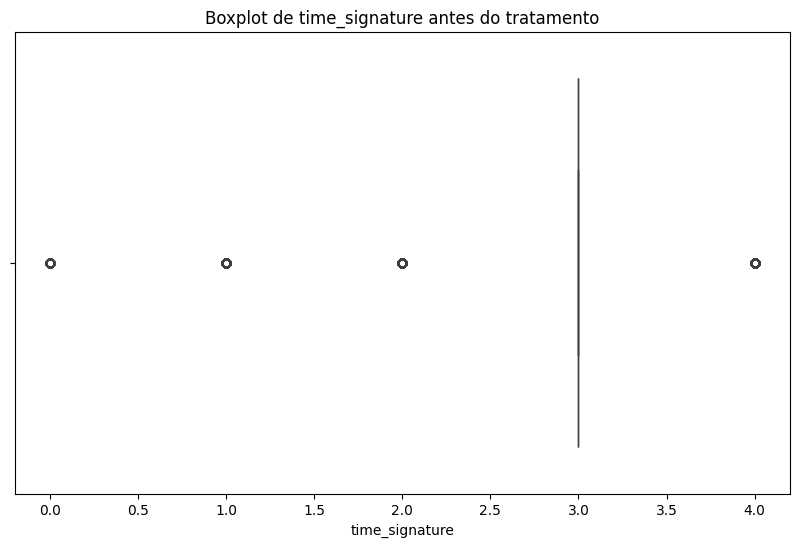

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


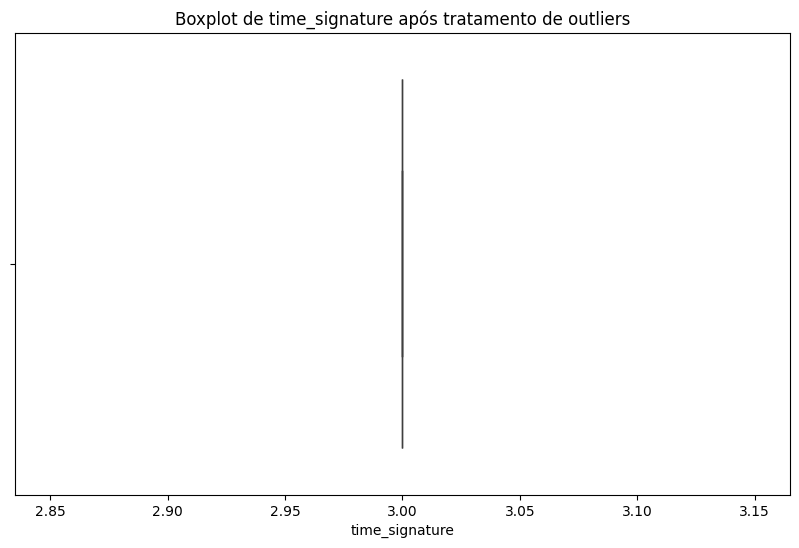

Número de outliers em popularity_target: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


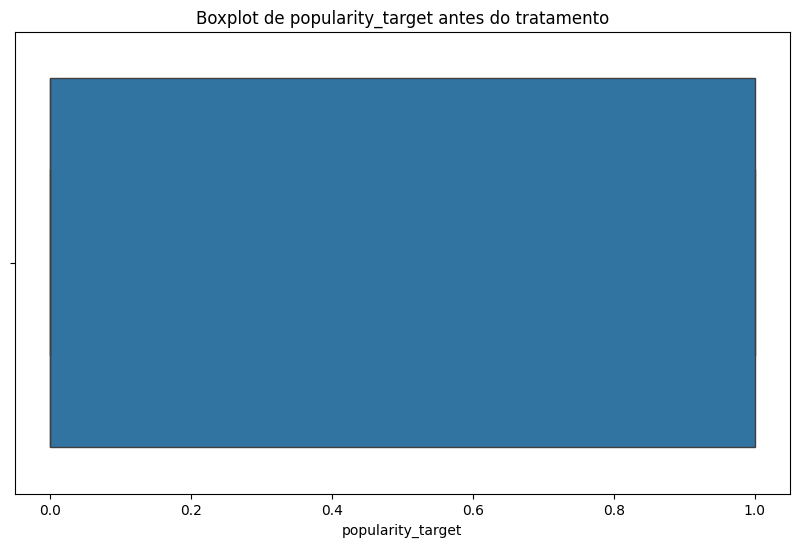

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


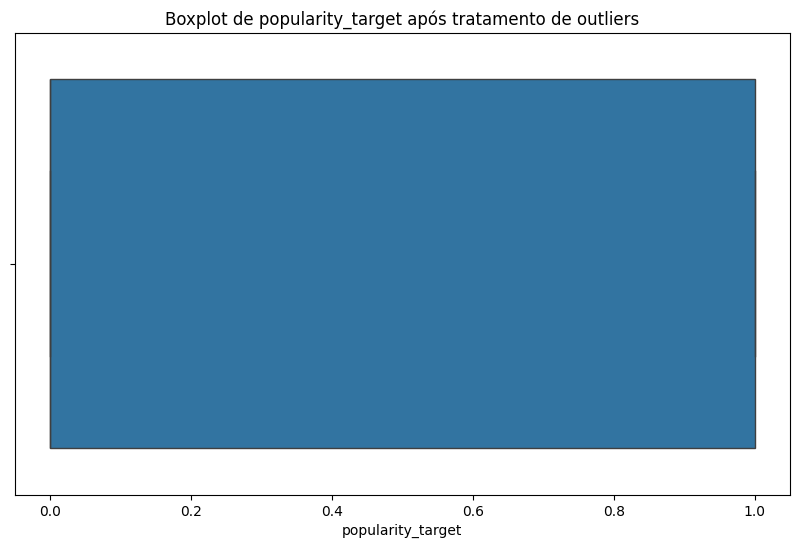

Outliers tratados nas seguintes colunas: Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'popularity_target'],
      dtype='object')


In [ ]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

cols = ['artists', 'track_unique_id', 'album_name', 'track_name']

df_cleaned = df.drop(columns=cols)

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

for column in numeric_columns:

    outliers = identify_outliers(df_cleaned, column)
    print(f"Número de outliers em {column}: {len(outliers)}")


    plt.figure(figsize=(10, 6))
    plt.title(f"Boxplot de {column} antes do tratamento")
    sns.boxplot(x=df_cleaned[column])
    plt.show()


    df_cleaned = treat_outliers(df_cleaned, column)


    plt.figure(figsize=(10, 6))
    plt.title(f"Boxplot de {column} após tratamento de outliers")
    sns.boxplot(x=df_cleaned[column])
    plt.show()

print("Outliers tratados nas seguintes colunas:", numeric_columns)



# Entendendo se existe um desbalanceamento de classes
Desbalanceamento de classes acontece em conjuntos de dados de classificação quando uma classe possui significativamente mais exemplos do que as outras. Essa situação pode prejudicar a performance de modelos de machine learning, pois tende a favorecer a classe majoritária, dificultando a previsão correta da classe minoritária.

In [ ]:
print(df['popularity_target'].value_counts())

popularity_target
0    40870
1    38930
Name: count, dtype: int64


In [ ]:
df2 = pd.read_csv('train.csv')

<ipython-input-22-55c0ed02c6da>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

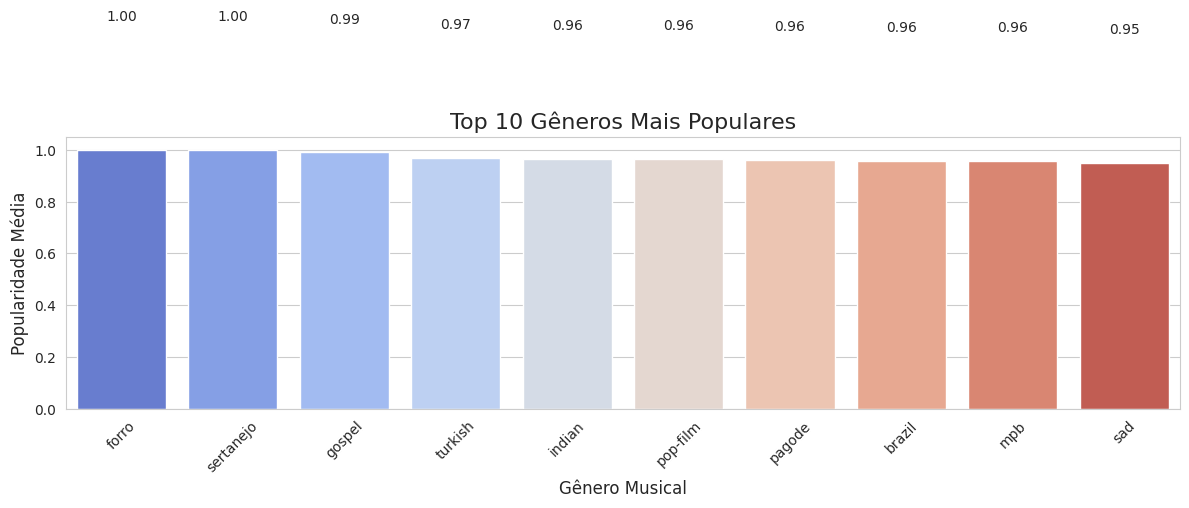

In [ ]:
top_genres = df2.groupby('track_genre')['popularity_target'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(x=top_genres.index, y=top_genres.values, palette='coolwarm')

plt.title('Top 10 Gêneros Mais Populares', fontsize=16)
plt.xlabel('Gênero Musical', fontsize=12)
plt.ylabel('Popularidade Média', fontsize=12)

plt.xticks(rotation=45)

for i, v in enumerate(top_genres.values):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-26-b0ac19cb5e4e>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Popularidade')


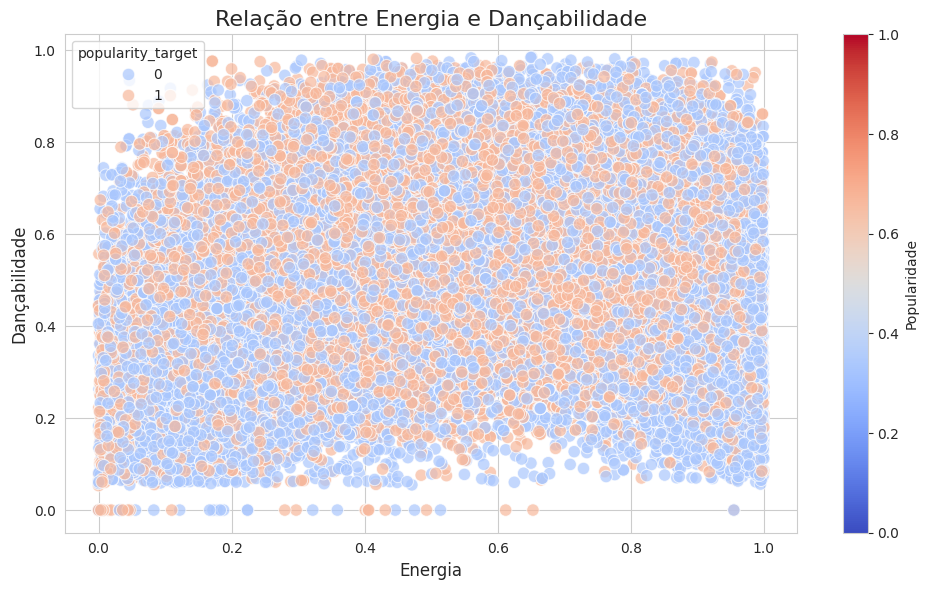

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    x='energy',
    y='danceability',
    hue='popularity_target',
    data=df,
    palette='coolwarm',
    alpha=0.7,
    s=80
)

norm = plt.Normalize(df['popularity_target'].min(), df['popularity_target'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Popularidade')

plt.title('Relação entre Energia e Dançabilidade', fontsize=16)
plt.xlabel('Energia', fontsize=12)
plt.ylabel('Dançabilidade', fontsize=12)

plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

df = pd.read_csv('train.csv')

selected_features = ['track_unique_id', 'artists', 'album_name', 'duration_ms', 'explicit',
                    'danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'time_signature']
X = df[selected_features].drop('track_unique_id', axis=1)
y = df['popularity_target']

numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
for col in categorical_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

joblib.dump(pipeline, 'best_random_forest_model.joblib')

new_data = pd.read_csv('test.csv')

new_data[numeric_cols] = new_data[numeric_cols].fillna(new_data[numeric_cols].mean())
for col in categorical_cols:
    new_data[col].fillna(new_data[col].mode()[0], inplace=True)

new_data_processed = new_data[selected_features].drop('track_unique_id', axis=1)

predictions = pipeline.predict(new_data_processed)

submission = pd.DataFrame({
    'track_unique_id': new_data['track_unique_id'],
    'popularity_target': predictions
})

submission.to_csv('predictions_results.csv', index=False)

print("Previsões concluídas e salvas em 'predictions_results.csv'")



<ipython-input-35-6b0cc5a2a3e1>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)


Acurácia no conjunto de teste: 0.8052005012531328

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      8247
           1       0.78      0.84      0.81      7713

    accuracy                           0.81     15960
   macro avg       0.81      0.81      0.81     15960
weighted avg       0.81      0.81      0.81     15960



<ipython-input-35-6b0cc5a2a3e1>:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data[col].fillna(new_data[col].mode()[0], inplace=True)


Previsões concluídas e salvas em 'predictions_results.csv'
